In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
import matplotlib
from datetime import timedelta

In [2]:
# Read the CSV file into Dataframe
Uber = pd.read_csv('Uber Request Data.csv')


In [3]:
# Convert the columns Request timestamp and Drop timestamp to proper Date Time format
Uber['Request timestamp'] = Uber['Request timestamp'].astype('datetime64[ns]')
Uber['Drop timestamp'] = Uber['Drop timestamp'].astype('datetime64[ns]')
# Read the CSV file into D

In [4]:
# Create new columns for Request Date and Request Time by extracting date and time from Request timestamp column
Uber['Request Date'] = Uber['Request timestamp'].dt.date
Uber['Request Time'] = Uber['Request timestamp'].dt.time


In [5]:
# Create new columns for Drop Date and Drop Time by extracting date and time from Request timestamp column
Uber['Drop Date'] = Uber['Drop timestamp'].dt.date
Uber['Drop Time'] = Uber['Drop timestamp'].dt.time

#Repalce NaT values with spaces

Uber['Drop Date'] = Uber['Drop Date'].fillna('')
Uber['Drop Time'] = Uber['Drop Time'].fillna('')

In [6]:
#Converting the column Driver ID from Float type to String
#Replace the null values with space
Uber['Driver id'] = Uber['Driver id'].fillna(-1)
Uber['Driver id'] = Uber['Driver id'].astype(int)
Uber['Driver id'] = Uber['Driver id'].astype(str)
Uber['Driver id'] = Uber['Driver id'].replace('-1', " ")


In [7]:
#Creating new columns to extract the Day,Month,Year from Request timestamp  column
Uber['Request Day'] = Uber['Request timestamp'].dt.day
Uber['Request Month'] = Uber['Request timestamp'].dt.month
Uber['Request Year'] = Uber['Request timestamp'].dt.year


In [8]:
#Creating new column to extract the hour from Request timestamp  column
Uber['Request Hour'] = Uber['Request timestamp'].dt.hour
Uber['Drop Hour'] = Uber['Drop timestamp'].dt.hour

In [9]:
#Creating new column to extract the weekday Name from Request timestamp column
Uber['Request WeekDay'] = Uber['Request timestamp'].dt.weekday_name


In [10]:
#Creating new columns to extract the Day,Month,Year from Drop timestamp  column
Uber['Drop Day'] = Uber['Drop timestamp'].dt.day
Uber['Drop Month'] = Uber['Drop timestamp'].dt.month
Uber['Drop Year'] = Uber['Drop timestamp'].dt.year


In [11]:
#Converting the column Drop Day from Float type to String
#Replace the null values with space

Uber['Drop Day'] = Uber['Drop Day'].fillna(-1)
Uber['Drop Day'] = Uber['Drop Day'].astype(int)
Uber['Drop Day'] = Uber['Drop Day'].astype(str)
Uber['Drop Day'] = Uber['Drop Day'].replace('-1', " ")

#Converting the column Drop month from Float type to String
#Replace the null values with space

Uber['Drop Month'] = Uber['Drop Month'].fillna(-1)
Uber['Drop Month'] = Uber['Drop Month'].astype(int)
Uber['Drop Month'] = Uber['Drop Month'].astype(str)
Uber['Drop Month'] = Uber['Drop Month'].replace('-1', " ")

#Converting the column Drop Year from Float type to String
#Replace the null values with space

Uber['Drop Year'] = Uber['Drop Year'].fillna(-1)
Uber['Drop Year'] = Uber['Drop Year'].astype(int)
Uber['Drop Year'] = Uber['Drop Year'].astype(str)
Uber['Drop Year'] = Uber['Drop Year'].replace('-1', " ")



In [12]:
#Create a column for colculation of time taken for trip completion
Uber['Time Taken for Completion-in minutes'] = Uber['Drop timestamp'] - Uber['Request timestamp']
Uber['Time Taken for Completion-in minutes'] = Uber['Time Taken for Completion-in minutes']/np.timedelta64(1,'m')


In [13]:
# Create a column for calculating time slot based on the Request Hour
Uber['Time_slots'] = pd.cut(Uber['Request Hour'], [0,6,12,18,24], labels=["Late Night", "Morning", "Noon","Late Evening"],right=False)

In [14]:
#Create a new Dataframe for Status of the Request
Cancelled_Request = Uber.loc[Uber.Status == 'Cancelled']
No_Cars_Available = Uber.loc[Uber.Status == 'No Cars Available']
Trip_Completed = Uber.loc[Uber.Status == 'Trip Completed']

In [16]:
#Obtain the percentage of the Status of the trips
Uber.Status.value_counts() / len(Uber.Status) *100


Trip Completed       41.971831
No Cars Available    39.288362
Cancelled            18.739807
Name: Status, dtype: float64

Text(0,0.5,'Count of Requests')

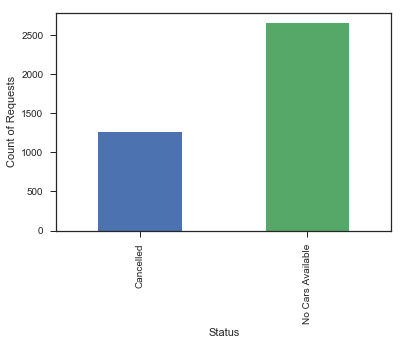

In [17]:
#Frequecy of Request through graphical representation

Frequency_Of_Request=Uber.groupby('Status').size()
Frequency_Of_Request[Frequency_Of_Request.index != "Trip Completed"].plot(kind='bar')
plt.ylabel('Count of Requests')


Text(0,0.5,'Count of Requests')

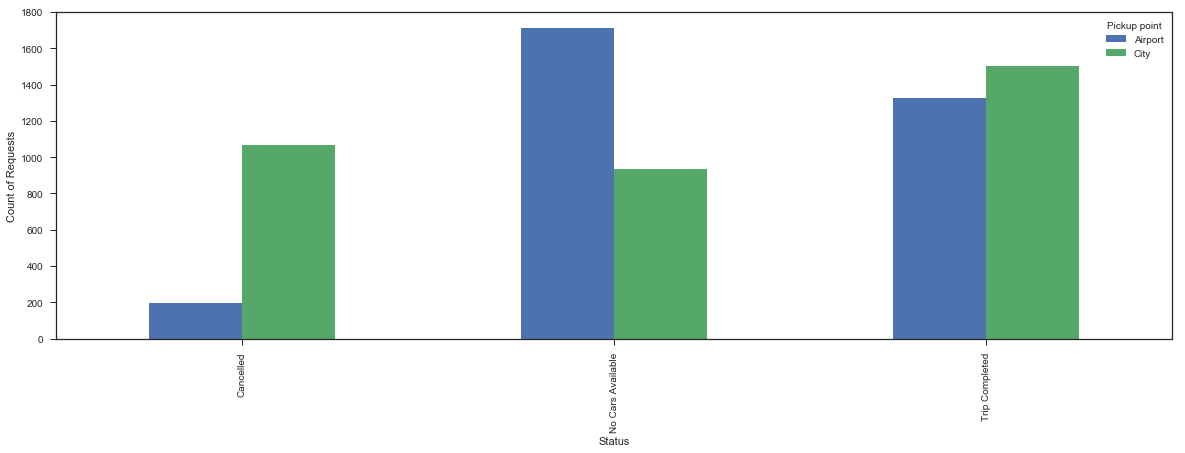

In [18]:
# Plot to identify the problematic type of request.

Uber.reset_index().pivot_table(index="Status", columns="Pickup point", aggfunc='size').plot(kind='bar',figsize=(20, 6))
plt.ylabel('Count of Requests')

Text(0,0.5,'Count of Requests')

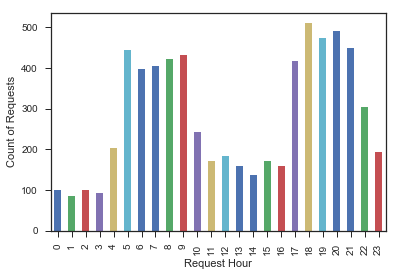

In [19]:
# Plot to find th time slot where higher gap exists

Uber.groupby('Request Hour').size().plot(kind='bar')
plt.ylabel('Count of Requests')

Text(0,0.5,'Count of Requests')

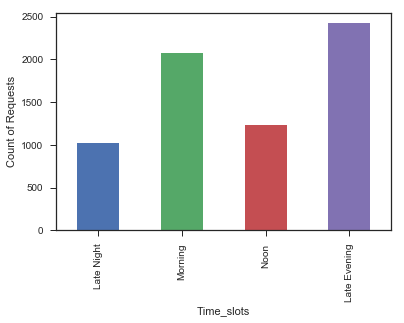

In [20]:
# Time Slot Plot to measure the demand    

Uber.groupby('Time_slots').size().plot(kind='bar')  
plt.ylabel('Count of Requests')

Text(0,0.5,'Count of Requests')

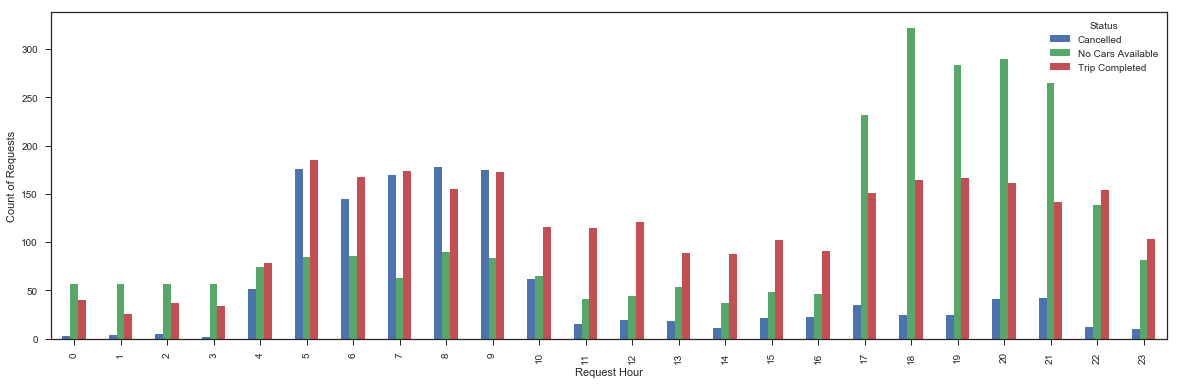

In [21]:
# Plot to find th time slot when higher gap exists
Uber.reset_index().pivot_table(index="Request Hour", columns="Status", aggfunc='size').plot(kind='bar',figsize=(20, 6))
plt.ylabel('Count of Requests')


Text(0,0.5,'Count of Requests')

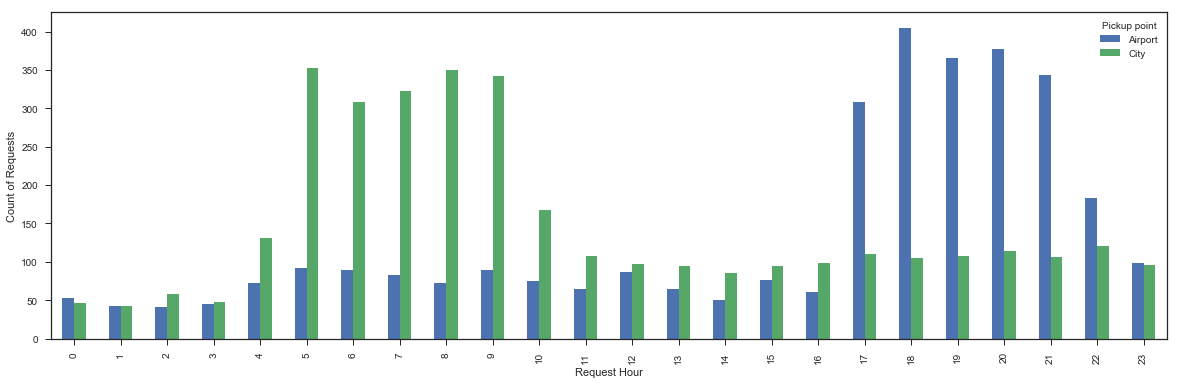

In [22]:
#Plot to see the type of request for which the gap is more 

Uber.reset_index().pivot_table(index="Request Hour", columns="Pickup point", aggfunc='size').plot(kind='bar',figsize=(20, 6))
plt.ylabel('Count of Requests')

Text(0,0.5,'Count of Requests')

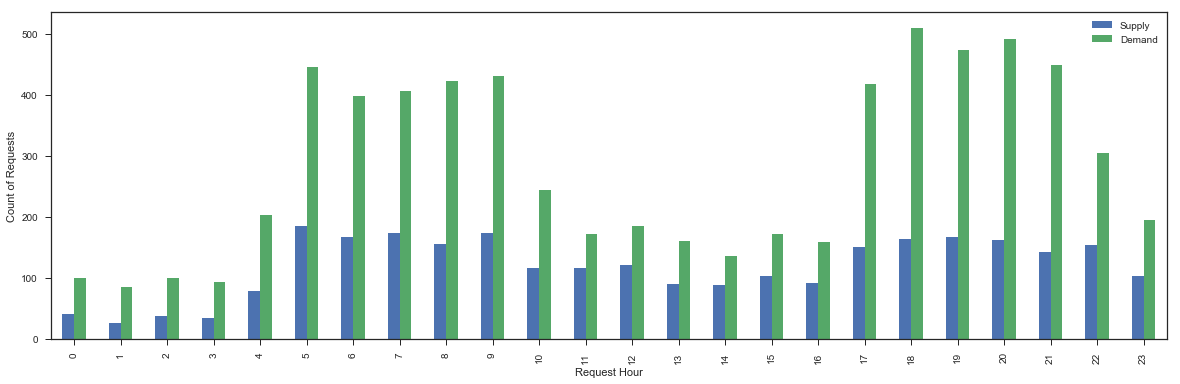

In [23]:
# Plotting a graph to find thh Supply Vs Demand

Demand=Uber.reset_index().pivot_table(index="Request id", columns="Request Hour", aggfunc='size').count()
Supply= Trip_Completed.reset_index().pivot_table(index="Request id", columns="Request Hour", aggfunc='size').count()
pd.DataFrame(Supply).merge(pd.DataFrame(Demand),on='Request Hour').plot(kind='bar',figsize=(20, 6)).legend(['Supply','Demand'])
plt.ylabel('Count of Requests')


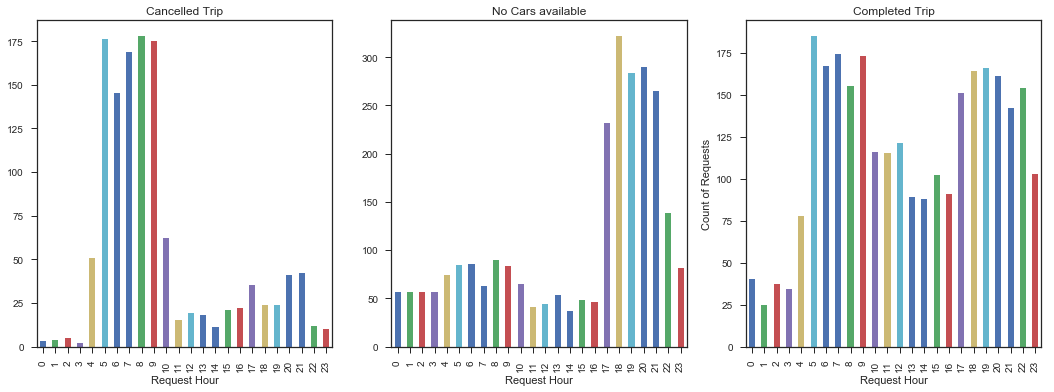

In [24]:
#Create plot to see the trend of the Request Hour for the trips

fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(18,6))
Cancelled_Request.groupby('Request Hour').size().plot(kind='bar',ax=axes[0], subplots=True)
No_Cars_Available.groupby('Request Hour').size().plot(kind='bar',ax=axes[1], subplots=True)
Trip_Completed.groupby('Request Hour').size().plot(kind='bar',ax=axes[2], subplots=True)
plt.ylabel('Count of Requests')
axes[0].title.set_text('Cancelled Trip')
axes[1].title.set_text('No Cars available')
axes[2].title.set_text('Completed Trip')


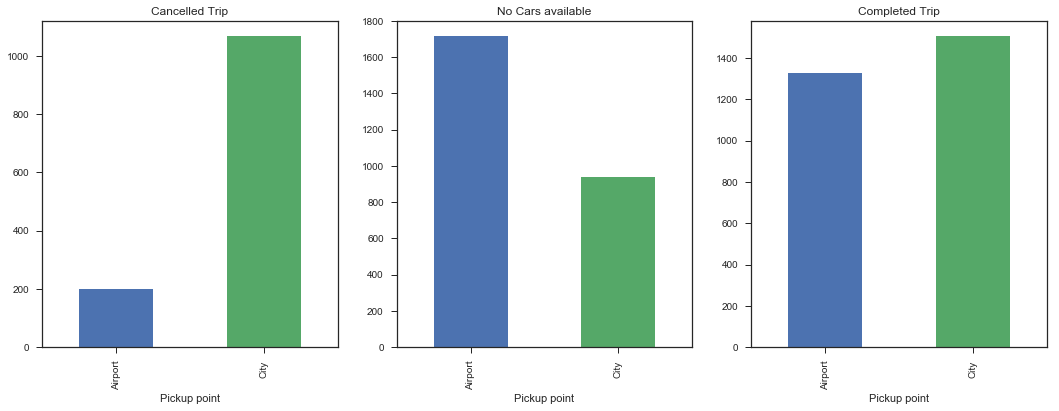

In [25]:
#Create plot to see the trend of the PickUp Point for the trips

fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(18,6))
Cancelled_Request.groupby('Pickup point').size().plot(kind='bar',ax=axes[0], subplots=True )
No_Cars_Available.groupby('Pickup point').size().plot(kind='bar',ax=axes[1], subplots=True)
Trip_Completed.groupby('Pickup point').size().plot(kind='bar',ax=axes[2], subplots=True)
axes[0].title.set_text('Cancelled Trip')
axes[1].title.set_text('No Cars available')
axes[2].title.set_text('Completed Trip')


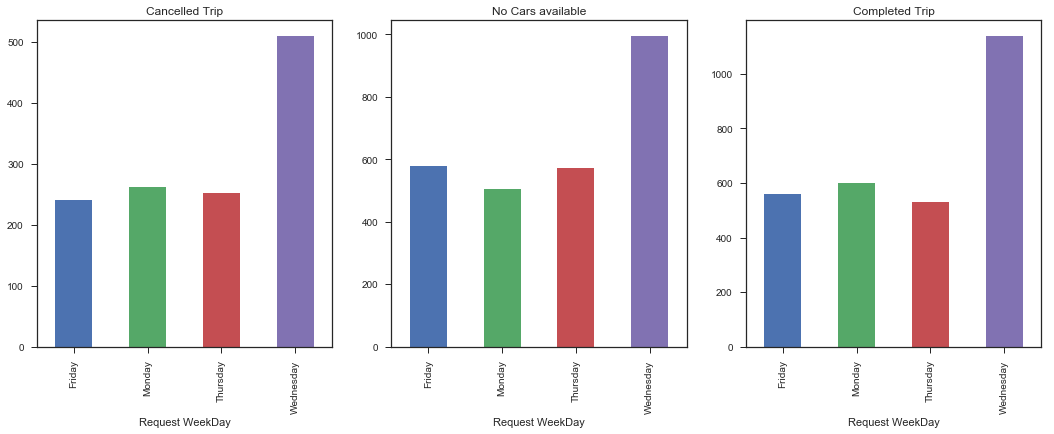

In [26]:
#Plot to see the day where more of trips done

fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(18,6))
Cancelled_Request.groupby('Request WeekDay').size().plot(kind='bar',ax=axes[0], subplots=True)
No_Cars_Available.groupby('Request WeekDay').size().plot(kind='bar',ax=axes[1], subplots=True)
Trip_Completed.groupby('Request WeekDay').size().plot(kind='bar',ax=axes[2], subplots=True)
axes[0].title.set_text('Cancelled Trip')
axes[1].title.set_text('No Cars available')
axes[2].title.set_text('Completed Trip')


In [27]:
# Average time taken for the trip completion where the status is Trip Completed

Trip_Completed = Trip_Completed[(Trip_Completed['Time Taken for Completion-in minutes'] >= 0)]
Trip_Completed["Time Taken for Completion-in minutes"].median()                    

52.266666666666666

In [28]:
# Calculate the number of trips taken by the drivers
Uber.groupby('Driver id')['Status'].count()

Driver id
       2650
1        13
10       10
100      11
101      13
102      14
103      12
104      12
105      18
106      11
107      19
108      11
109      18
11        8
110      14
111      10
112      14
113      13
114      20
115      11
116      12
117       8
118      16
119      14
12       12
120      13
121      16
122       9
123       7
124      11
       ... 
72       12
73       17
74       14
75       11
76       15
77       14
78       19
79       17
8         9
80       18
81       17
82       13
83       14
84       21
85       16
86       15
87       11
88       13
89       13
9        19
90       11
91        9
92       13
93       10
94       12
95        9
96       16
97       13
98       18
99       15
Name: Status, Length: 301, dtype: int64

In [29]:
Top10_Drivers_Cancelled=Cancelled_Request['Driver id'].value_counts().head(10)
Top10_Drivers_Cancelled

84     12
54     11
142    10
206    10
267     9
210     9
138     9
27      9
166     9
114     9
Name: Driver id, dtype: int64